I have loaded the training data and filtered it because just I need 0 and 6. 0 as aregular class and 6 as outlier class(500 images). we have a standard denser and convolutional. That I have applied them on regular and outlier class. I put comments on the functions to clarify it.


In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
(x_train,y_train),(_,_) = mnist.load_data()

train_filter_6 = np.where((y_train == 6))
train_filter_0 = np.where((y_train == 0))


x0, y0 = x_train[train_filter_0],y_train[train_filter_0]
x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0 ,test_size=0.1, random_state = 42)


x6 , y6 = x_train[train_filter_6][:500],y_train[train_filter_6][:500]
x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size=0.1, random_state = 42)



11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
import keras
from keras import layers


encoding_dim = 32 

# This is our input image
input_img = keras.Input(shape=(784,))


# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.datasets import mnist
import numpy as np

x0_train = x0_train.astype('float32') / 255.
x0_test = x0_test.astype('float32') / 255.
x0_train = x0_train.reshape((len(x0_train), np.prod(x0_train.shape[1:])))
x0_test = x0_test.reshape((len(x0_test), np.prod(x0_test.shape[1:])))


print(x0_train.shape)
print(x0_test.shape)


autoencoder.fit(x0_train, x0_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x0_test, x0_test))


(5330, 784)
(593, 784)
Epoch 1/50
21/21 [==============================] - 1s 29ms/step - loss: 0.6537 - val_loss: 0.4035
Epoch 2/50
21/21 [==============================] - 0s 12ms/step - loss: 0.3431 - val_loss: 0.2689
Epoch 3/50
21/21 [==============================] - 0s 12ms/step - loss: 0.2608 - val_loss: 0.2516
Epoch 4/50
21/21 [==============================] - 0s 12ms/step - loss: 0.2449 - val_loss: 0.2362
Epoch 5/50
21/21 [==============================] - 0s 12ms/step - loss: 0.2288 - val_loss: 0.2227
Epoch 6/50
21/21 [==============================] - 0s 12ms/step - loss: 0.2152 - val_loss: 0.2114
Epoch 7/50
21/21 [==============================] - 0s 12ms/step - loss: 0.2055 - val_loss: 0.2029
Epoch 8/50
21/21 [==============================] - 0s 13ms/step - loss: 0.1972 - val_loss: 0.1964
Epoch 9/50
21/21 [==============================] - 0s 12ms/step - loss: 0.1916 - val_loss: 0.1915
Epoch 10/50
21/21 [==============================] - 0s 12ms/step - loss: 0.1869 - val

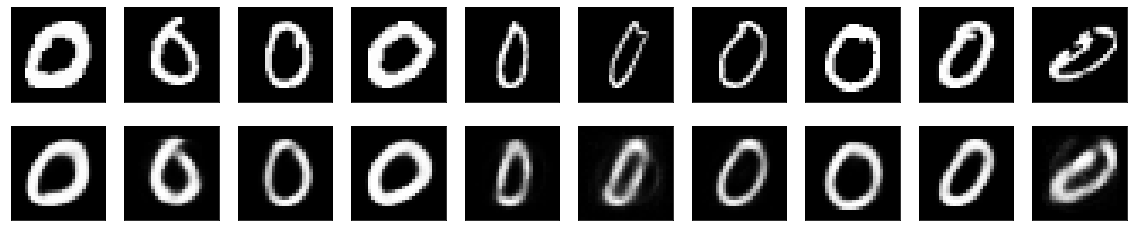

In [ ]:

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x0_test)
decoded_imgs = decoder.predict(encoded_imgs)
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x0_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

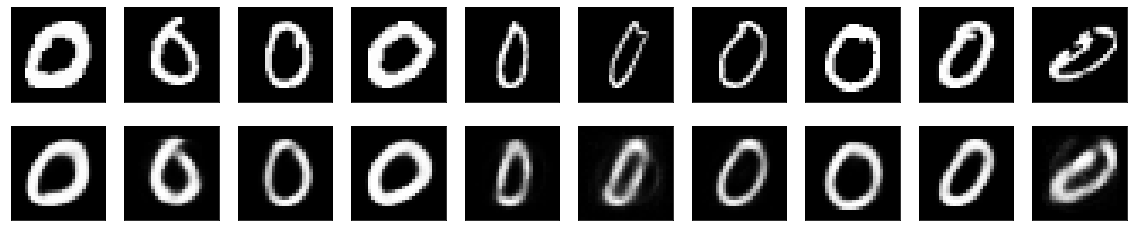

In [ ]:

# Encode and decode some digits
# Note that we take them from the *test* set
decoded_imgs = autoencoder.predict(x0_test)
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x0_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:

input_img2 = Input(shape=(28, 28, 1)) 

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img2)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded2 = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded2)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded2 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder2 = Model(input_img2, decoded2)
autoencoder2.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder2.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0   

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train,y_train),(_,_) = mnist.load_data()

train_filter_6 = np.where((y_train == 6))
train_filter_0 = np.where((y_train == 0))


x0, y0 = x_train[train_filter_0],y_train[train_filter_0]
x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0 ,test_size=0.1, random_state = 42)

x0_train = x0_train.astype('float32') / 255.
x0_test = x0_test.astype('float32') / 255.

print(x0_train.shape)
print(x0_test.shape)


autoencoder2.fit(x0_train, x0_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x0_test, x0_test))

(5330, 28, 28)
(593, 28, 28)
Epoch 1/50
21/21 [==============================] - 14s 649ms/step - loss: 0.5614 - val_loss: 0.3417
Epoch 2/50
21/21 [==============================] - 13s 643ms/step - loss: 0.3036 - val_loss: 0.2375
Epoch 3/50
21/21 [==============================] - 13s 640ms/step - loss: 0.2123 - val_loss: 0.1738
Epoch 4/50
21/21 [==============================] - 13s 637ms/step - loss: 0.1646 - val_loss: 0.1561
Epoch 5/50
21/21 [==============================] - 13s 639ms/step - loss: 0.1457 - val_loss: 0.1347
Epoch 6/50
21/21 [==============================] - 13s 639ms/step - loss: 0.1380 - val_loss: 0.1364
Epoch 7/50
21/21 [==============================] - 13s 638ms/step - loss: 0.1291 - val_loss: 0.1275
Epoch 8/50
21/21 [==============================] - 13s 637ms/step - loss: 0.1229 - val_loss: 0.1230
Epoch 9/50
21/21 [==============================] - 13s 643ms/step - loss: 0.1202 - val_loss: 0.1203
Epoch 10/50
21/21 [==============================] - 13s 642ms

(593, 28, 28)
(593, 28, 28, 1)


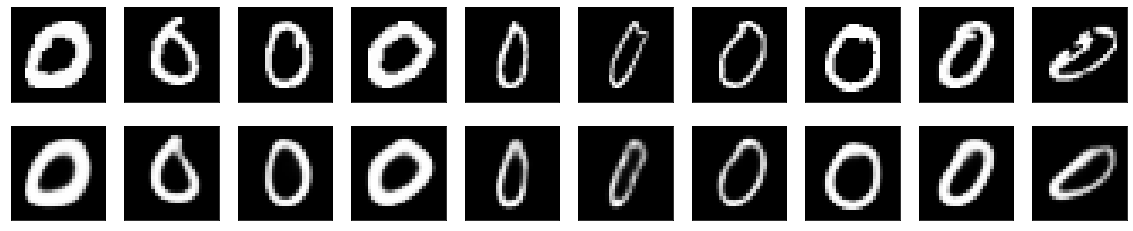

In [ ]:

# Encode and decode some digits
# Note that we take them from the *test* set
decoded_imgs2 = autoencoder2.predict(x0_test)

print(x0_test.shape)
print(decoded_imgs2.shape)

decoded_imgs2 = np.array(decoded_imgs2)

# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x0_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs2[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

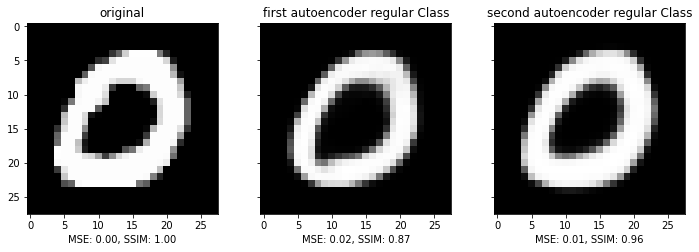

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error


img = x0_test[0].reshape(28, 28)
rows, cols = img.shape

img_const2 = decoded_imgs2[0].reshape(28,28)
img_const = decoded_imgs[0].reshape(28,28)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()

mse_none = mean_squared_error(img, img)
ssim_none = ssim(img, img, data_range=img.max() - img.min())

mse_const = mean_squared_error(img, img_const)
ssim_const = ssim(img, img_const, data_range=img_const.max() - img_const.min())

mse_const2 = mean_squared_error(img, img_const2)
ssim_const2 = ssim(img, img_const2,
                  data_range=img_const2.max() - img_const2.min())

label = 'MSE: {:.2f}, SSIM: {:.2f}'

ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(label.format(mse_none, ssim_none))
ax[0].set_title('original')


ax[1].imshow(img_const, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(label.format(mse_const, ssim_const))
ax[1].set_title('first autoencoder regular Class')


ax[2].imshow(img_const2, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[2].set_xlabel(label.format(mse_const2, ssim_const2))
ax[2].set_title('second autoencoder regular Class')

plt.tight_layout()
plt.show()

In [ ]:

x6, y6 = x_train[train_filter_6][:500],y_train[train_filter_6][:500]
x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size=0.1, random_state = 42)

x6_train = x6_train.astype('float32') / 255.
x6_test = x6_test.astype('float32') / 255.
x6_train = x6_train.reshape((len(x6_train), np.prod(x6_train.shape[1:])))
x6_test = x6_test.reshape((len(x6_test), np.prod(x6_test.shape[1:])))
print(x6_train.shape)
print(x6_test.shape)


autoencoder.fit(x6_train, x6_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x6_test, x6_test))

(450, 784)
(50, 784)
Epoch 1/50
2/2 [==============================] - 0s 99ms/step - loss: 0.1081 - val_loss: 0.1105
Epoch 2/50
2/2 [==============================] - 0s 51ms/step - loss: 0.1078 - val_loss: 0.1103
Epoch 3/50
2/2 [==============================] - 0s 49ms/step - loss: 0.1075 - val_loss: 0.1101
Epoch 4/50
2/2 [==============================] - 0s 49ms/step - loss: 0.1073 - val_loss: 0.1099
Epoch 5/50
2/2 [==============================] - 0s 48ms/step - loss: 0.1070 - val_loss: 0.1097
Epoch 6/50
2/2 [==============================] - 0s 47ms/step - loss: 0.1067 - val_loss: 0.1095
Epoch 7/50
2/2 [==============================] - 0s 49ms/step - loss: 0.1065 - val_loss: 0.1093
Epoch 8/50
2/2 [==============================] - 0s 48ms/step - loss: 0.1063 - val_loss: 0.1092
Epoch 9/50
2/2 [==============================] - 0s 48ms/step - loss: 0.1060 - val_loss: 0.1090
Epoch 10/50
2/2 [==============================] - 0s 51ms/step - loss: 0.1058 - val_loss: 0.1088
Epoch 11

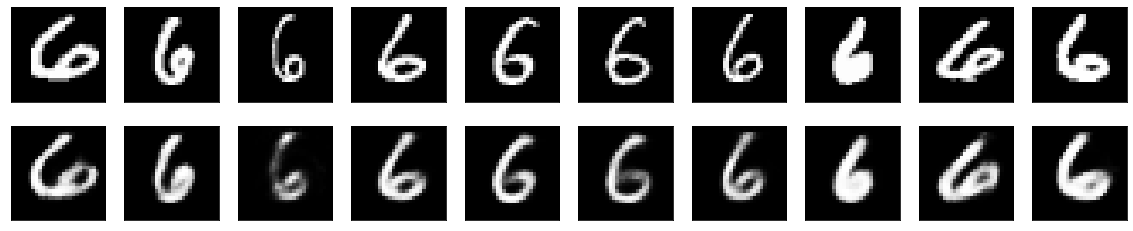

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
decoded_imgs = autoencoder.predict(x6_test)
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x6_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:

x6, y6 = x_train[train_filter_6][:500],y_train[train_filter_6][:500]
x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size=0.1, random_state = 42)

x6_train = x6_train.astype('float32') / 255.
x6_test = x6_test.astype('float32') / 255.

print(x6_train.shape)
print(x6_test.shape)


autoencoder2.fit(x6_train, x6_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x6_test, x6_test))

(450, 28, 28)
(50, 28, 28)
Epoch 1/50
2/2 [==============================] - 1s 602ms/step - loss: 0.1453 - val_loss: 0.1425
Epoch 2/50
2/2 [==============================] - 1s 556ms/step - loss: 0.1454 - val_loss: 0.1298
Epoch 3/50
2/2 [==============================] - 1s 554ms/step - loss: 0.1271 - val_loss: 0.1217
Epoch 4/50
2/2 [==============================] - 1s 550ms/step - loss: 0.1224 - val_loss: 0.1176
Epoch 5/50
2/2 [==============================] - 1s 552ms/step - loss: 0.1190 - val_loss: 0.1155
Epoch 6/50
2/2 [==============================] - 1s 566ms/step - loss: 0.1161 - val_loss: 0.1143
Epoch 7/50
2/2 [==============================] - 1s 541ms/step - loss: 0.1143 - val_loss: 0.1114
Epoch 8/50
2/2 [==============================] - 1s 548ms/step - loss: 0.1119 - val_loss: 0.1099
Epoch 9/50
2/2 [==============================] - 1s 556ms/step - loss: 0.1101 - val_loss: 0.1095
Epoch 10/50
2/2 [==============================] - 1s 551ms/step - loss: 0.1090 - val_loss:

(50, 28, 28)
(50, 28, 28, 1)


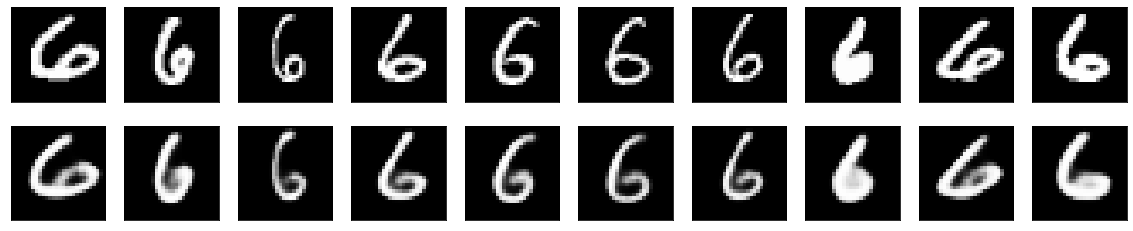

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
decoded_imgs2 = autoencoder2.predict(x6_test)

print(x6_test.shape)
print(decoded_imgs2.shape)
decoded_imgs2 = np.array(decoded_imgs2)

# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x6_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs2[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

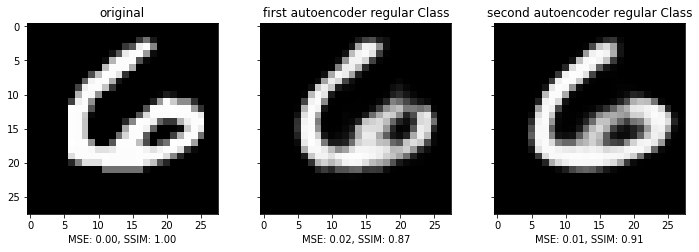

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error


img = x6_test[0].reshape(28, 28)
rows, cols = img.shape

img_const2 = decoded_imgs2[0].reshape(28,28)
img_const = decoded_imgs[0].reshape(28,28)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()

mse_none = mean_squared_error(img, img)
ssim_none = ssim(img, img, data_range=img.max() - img.min())

mse_const = mean_squared_error(img, img_const)
ssim_const = ssim(img, img_const, data_range=img_const.max() - img_const.min())

mse_const2 = mean_squared_error(img, img_const2)
ssim_const2 = ssim(img, img_const2,
                  data_range=img_const2.max() - img_const2.min())

label = 'MSE: {:.2f}, SSIM: {:.2f}'

ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(label.format(mse_none, ssim_none))
ax[0].set_title('original')


ax[1].imshow(img_const, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(label.format(mse_const, ssim_const))
ax[1].set_title('first autoencoder regular Class')


ax[2].imshow(img_const2, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[2].set_xlabel(label.format(mse_const2, ssim_const2))
ax[2].set_title('second autoencoder regular Class')

plt.tight_layout()
plt.show()

The reconstruction loss error for outlier class is greater than the reconstruction loss for regular class. When the reconstruction loss is lower it means that the reconstruction action done better. The model is trained with the regular class so we are expecting that this thing happen. SSIM shows how images are the same as each other.when it is near to 1,the reconstruction better matches with the original image.  for reglar class it is more near to 1 and shows that reconstruction action is done better.(for regular is 0.96 for outlier class is 0.91).